# Подготовка датасета


In [1]:
# Загрузка модуля pandas
import pandas as pd
# Загрузка файлов из облака
import gdown
# Библиотека для работы с массивами данных
import numpy as np
#Библиотека для построения графиков
import matplotlib.pyplot as plt
# Команда для отображения графики в ячейках среды Google Colaboratory
%matplotlib inline
# Библиотека для построения графиков
import seaborn as sns
import math
import re
import os.path

from IPython.display import clear_output
# Для работы с датами
from datetime import datetime


In [2]:
# Загрузка файла из облака в colab
import gdown
gdown.download('https://drive.google.com/uc?id=1HneSc4fEx4ayjOU2CwFMzr3pdWW3wK58', None, quiet=True)


'dataset1.csv'

In [3]:
data = pd.read_csv('dataset1.csv')



In [4]:
data

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,False,False,True,Осимертиниб,"Возможна низкая эффективность Дурвалумаба, Оси..."
248828,248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение,True,False,False,0,0
248829,248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."
248830,248831,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,...,от 43 до 60 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб,False,False,True,Дурвалумаб,"Возможна низкая эффективность Дурвалумаба, Але..."


In [5]:
# Параметр index_col определяет столбец, который будет использоваться как индекс в таблице
data = pd.read_csv('dataset1.csv', index_col=0)

# Вывод первых 10 строк таблицы
data.head(10)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
id_ответа,,,,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
6,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,не исследовались,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
7,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,"Возможна низкая эффективность Дурвалумаба, Оси..."
8,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,"Возможна низкая эффективность Дурвалумаба, Оси..."
9,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,0


In [6]:
data.count()

Раса                                                        248832
Пол                                                         248832
Возраст                                                     248832
Статус курения                                              248832
ECOG                                                        248832
Есть опухолевая нагрузка? (симптомная опухоль)              248832
Ко-мутации KRAS                                             248832
Ко-мутации p53.                                             248832
Ко-мутации STK11                                            248832
Ко-мутации KEAP1                                            248832
Срок от окончания ХЛТ                                       248832
Молекулярный статус (только для неплоскоклеточного рака)    248832
PD-L1 статус                                                248832
Предпочтение пациента по ответу на терапию                  248832
Ответ эксперта (Лактионов)                                  24

In [7]:
data.describe()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
count,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832
unique,3,2,2,3,2,2,2,2,2,2,3,6,3,2,4,2,2,2,5,11
top,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,False,False,0,0
freq,82944,124416,124416,82944,124416,124416,124416,124416,124416,124416,82944,41472,82944,124416,140544,158976,158976,179712,103680,62208


In [8]:

data.nunique()

Раса                                                         3
Пол                                                          2
Возраст                                                      2
Статус курения                                               3
ECOG                                                         2
Есть опухолевая нагрузка? (симптомная опухоль)               2
Ко-мутации KRAS                                              2
Ко-мутации p53.                                              2
Ко-мутации STK11                                             2
Ко-мутации KEAP1                                             2
Срок от окончания ХЛТ                                        3
Молекулярный статус (только для неплоскоклеточного рака)     6
PD-L1 статус                                                 3
Предпочтение пациента по ответу на терапию                   2
Ответ эксперта (Лактионов)                                   4
Поставьте галочку, если уверены на 100%                

In [9]:
# перебираю все названия столбцов и для каждого вывожу список уникальных значений
for name, values in data.items():
  print(name, ":", data[name].unique())

Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' '2']
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб' 'Наблюдение' 'Осимертиниб' 'Алектиниб']
Поставьте галочку, если уверены на 100% : [ True False]


# Приведение датасета к векторному виду

In [23]:
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
from tensorflow.keras import utils # Будем использовать эту библиотеку для

In [15]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 7

In [36]:
def get_columns_list(df):
  df1_colnames = data.columns.tolist()
  # print(f'названия колонок: {len(df1_colnames)}: {df1_colnames}')

  lst_count = len(df1_colnames)
  for i in range(lst_count):
    i_elem = df1_colnames[i]
    print(f"{i}->{lst_count}: '{i_elem}'")

  return df1_colnames

get_columns_list(data)

0->20: 'Раса'
1->20: 'Пол'
2->20: 'Возраст'
3->20: 'Статус курения'
4->20: 'ECOG'
5->20: 'Есть опухолевая нагрузка? (симптомная опухоль)'
6->20: 'Ко-мутации KRAS'
7->20: 'Ко-мутации p53.'
8->20: 'Ко-мутации STK11'
9->20: 'Ко-мутации KEAP1'
10->20: 'Срок от окончания ХЛТ'
11->20: 'Молекулярный статус (только для неплоскоклеточного рака)'
12->20: 'PD-L1 статус'
13->20: 'Предпочтение пациента по ответу на терапию'
14->20: 'Ответ эксперта (Лактионов)'
15->20: 'Поставьте галочку, если уверены на 100%'
16->20: 'Если 75%'
17->20: 'Если 50%'
18->20: 'Альтернатива, если 50% - обязательно'
19->20: 'Комментарий'


['Раса',
 'Пол',
 'Возраст',
 'Статус курения',
 'ECOG',
 'Есть опухолевая нагрузка? (симптомная опухоль)',
 'Ко-мутации KRAS',
 'Ко-мутации p53.',
 'Ко-мутации STK11',
 'Ко-мутации KEAP1',
 'Срок от окончания ХЛТ',
 'Молекулярный статус (только для неплоскоклеточного рака)',
 'PD-L1 статус',
 'Предпочтение пациента по ответу на терапию',
 'Ответ эксперта (Лактионов)',
 'Поставьте галочку, если уверены на 100%',
 'Если 75%',
 'Если 50%',
 'Альтернатива, если 50% - обязательно',
 'Комментарий']

In [193]:
# делаю словарь, где каждому значению индекса столбца сопоставляю массив уникальных значений ячейки, чтобы потом работать с индексами этого массива
data_colnames = data.columns.tolist() # названия столбцов записываю в список
def getDictionary(data):
  dict={} # будущий словарь

  for name in data_colnames: # перебираю названия столбцов
   index = data_colnames.index(name) # индекс столбца таблицы
   uniq = data[name].unique()
   if uniq[0]!='0':
     a = np.insert(uniq, 0, '0')
     dict[index] =a
   else:
    dict [index] = data[name].unique() # ключ - индекс, значение - список уникальных значений
  return dict

dictionaryDefault = getDictionary(data)
print(dictionaryDefault)

{0: array(['0', 'Азиатская', 'Европейская', 'Другая'], dtype=object), 1: array(['0', ' Мужской', ' Женский'], dtype=object), 2: array(['0', ' До 70', ' >70'], dtype=object), 3: array(['0', ' В настоящее время',
       ' Курение в прошлом (бросил более 1 месяца до 1 года)',
       ' Курение в прошлом (бросил более 1 года)'], dtype=object), 4: array(['0', ' 0-1', '2'], dtype=object), 5: array(['0', ' да', ' нет'], dtype=object), 6: array(['0', ' да', ' нет'], dtype=object), 7: array(['0', ' да', ' нет'], dtype=object), 8: array(['0', ' да', ' нет'], dtype=object), 9: array(['0', ' да', ' нет'], dtype=object), 10: array(['0', 'до 42 дней', 'от 43 до 60 дней', 'более 61 дня'],
      dtype=object), 11: array(['0', ' нет мутаций', ' не исследовались', ' EGFR редкий вариант',
       ' EGFR ex19', ' EGFR ex21', ' ALK позитивный'], dtype=object), 12: array(['0', ' Не исследовался', ' Менее 1%', ' Более 1%'], dtype=object), 13: array(['0', ' Результативность лечения', ' сохранение качества жизни

In [198]:
# берём значение ячейки и
def get01Data(values):
  x_data = [] # Здесь будем хранить кодированные значения
  y_data = [] # Здесь будем хранить данные о ЗП

  for val in values: # пребираю строки (они в виде списка)
    ohe = [] # закодированная строка OHE
    for i in range(len(val)):
     currentList =  dictionaryDefault[i].tolist() # находим список значений для каждого индекса
     currentIndex = currentList.index(val[i])
     a = np.argmax(list(utils.to_categorical(currentIndex, len(currentList)).astype('int')))
     ohe.append(a)

     #  ohe += list(utils.to_categorical(currentIndex, len(x)).astype('int'))

    x_data.append(ohe)
  return x_data


df1=get01Data(data.values)


In [199]:
categorical = pd.DataFrame(df1,columns=data_colnames)

In [200]:
categorical.head(10)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,0,1,1,0,0
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1,2,2,0,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,0,1,0,2
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,0,1,0,2
5,1,1,1,1,1,1,1,1,1,1,3,2,1,1,2,2,0,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,3,1,1,2,0,1,1,0,3
7,1,1,1,1,1,1,1,1,1,1,2,3,1,1,2,0,1,1,0,3
8,1,1,1,1,1,1,1,1,1,1,3,3,1,1,2,0,1,1,0,0
9,1,1,1,1,1,1,1,1,1,1,1,4,1,1,3,2,0,1,2,3


<Axes: >

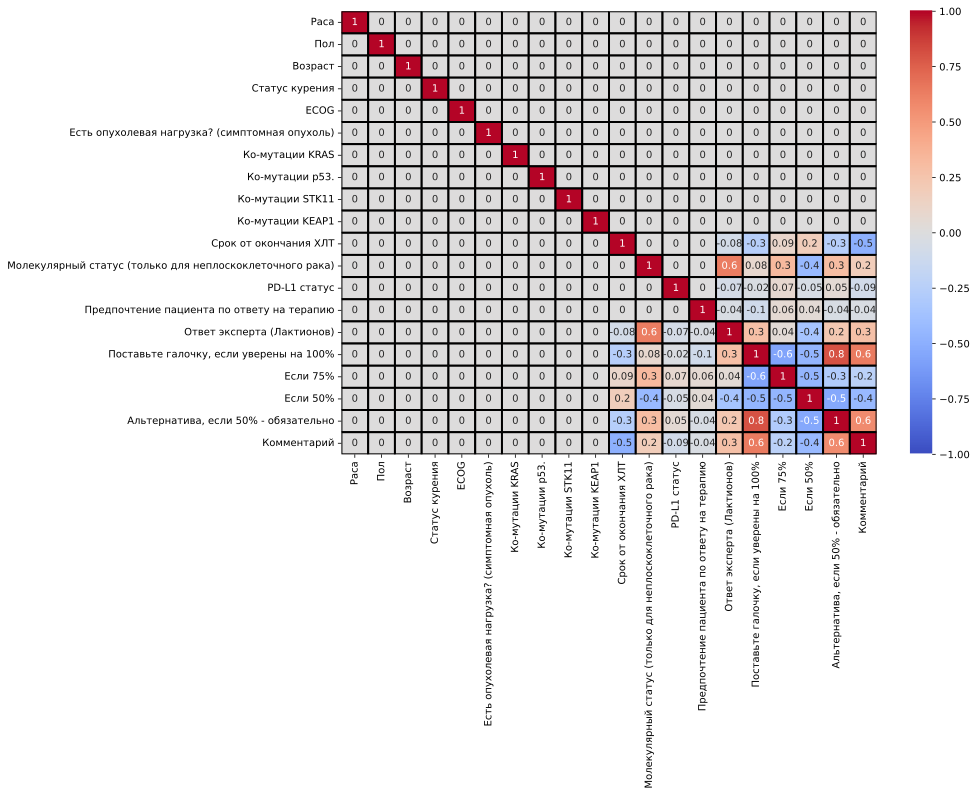

In [201]:
rcParams['figure.figsize'] = 12, 8 # увеличим размер графиков
# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = categorical.corr('spearman')
# Можно указать в параметрах способ подсчета.
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

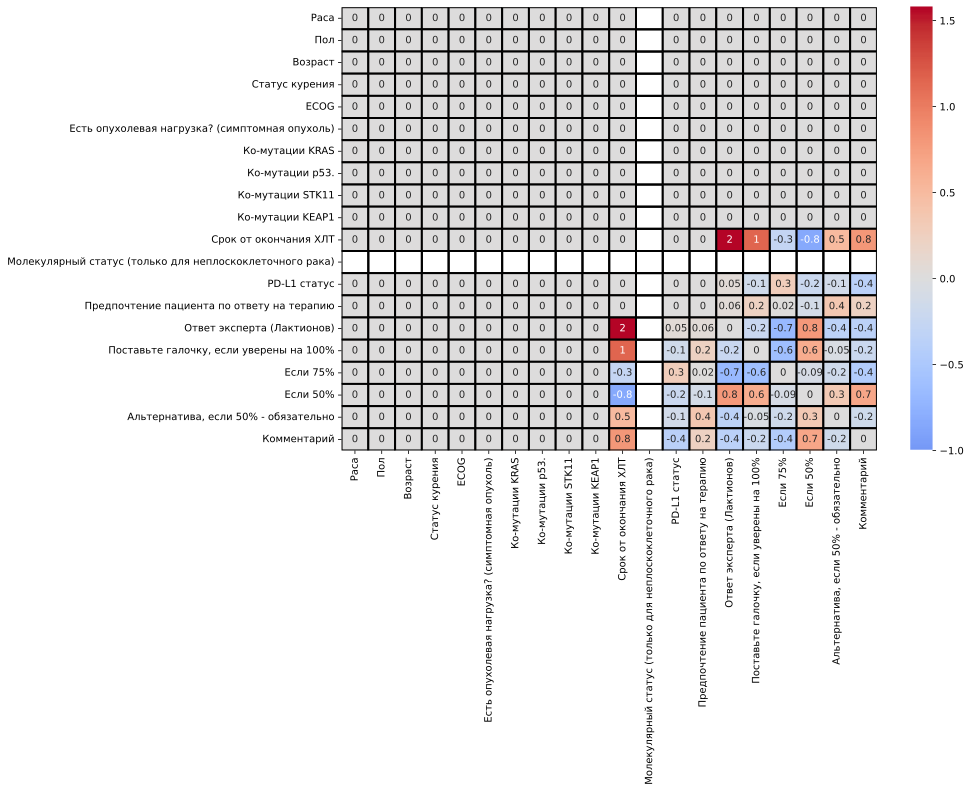

In [205]:
# Посмотрим на корреляцию для столбца Молекулярный статус (только для неплоскоклеточного рака)
corr_matrix = categorical[categorical['Молекулярный статус (только для неплоскоклеточного рака)'] == 1].corr('spearman')\
- categorical[categorical['Молекулярный статус (только для неплоскоклеточного рака)'] == 6].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

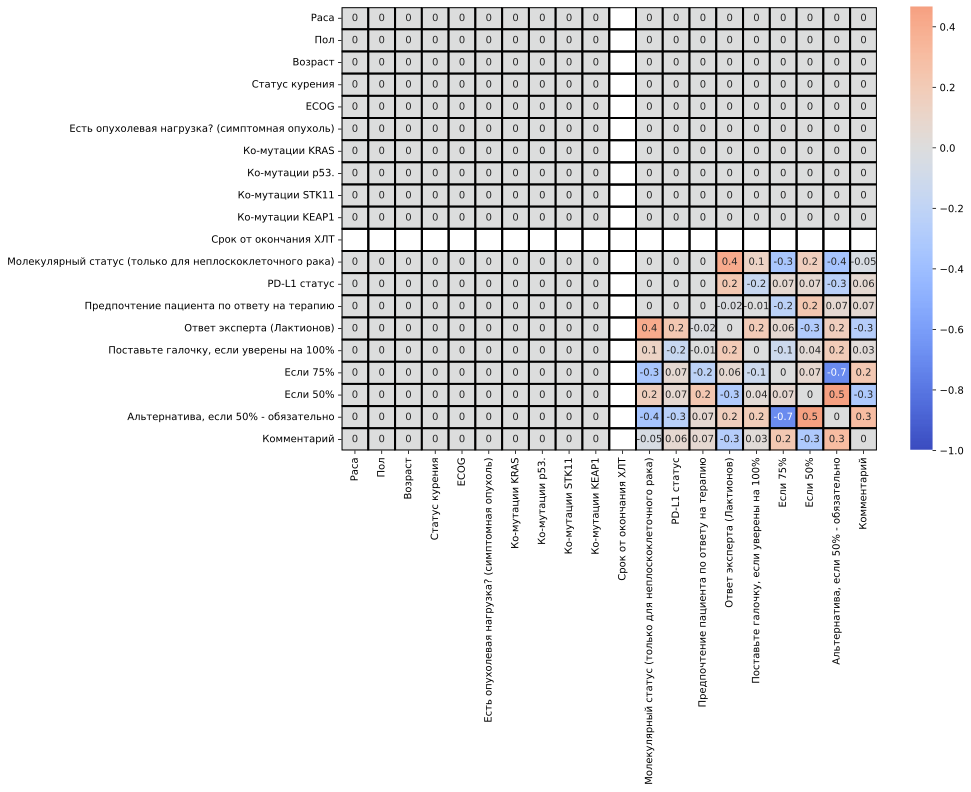

In [206]:
# Посмотрим на корреляцию для столбца Срок от окончания ХЛТ
corr_matrix = categorical[categorical['Срок от окончания ХЛТ'] == 1].corr('spearman')\
- categorical[categorical['Срок от окончания ХЛТ'] == 3].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

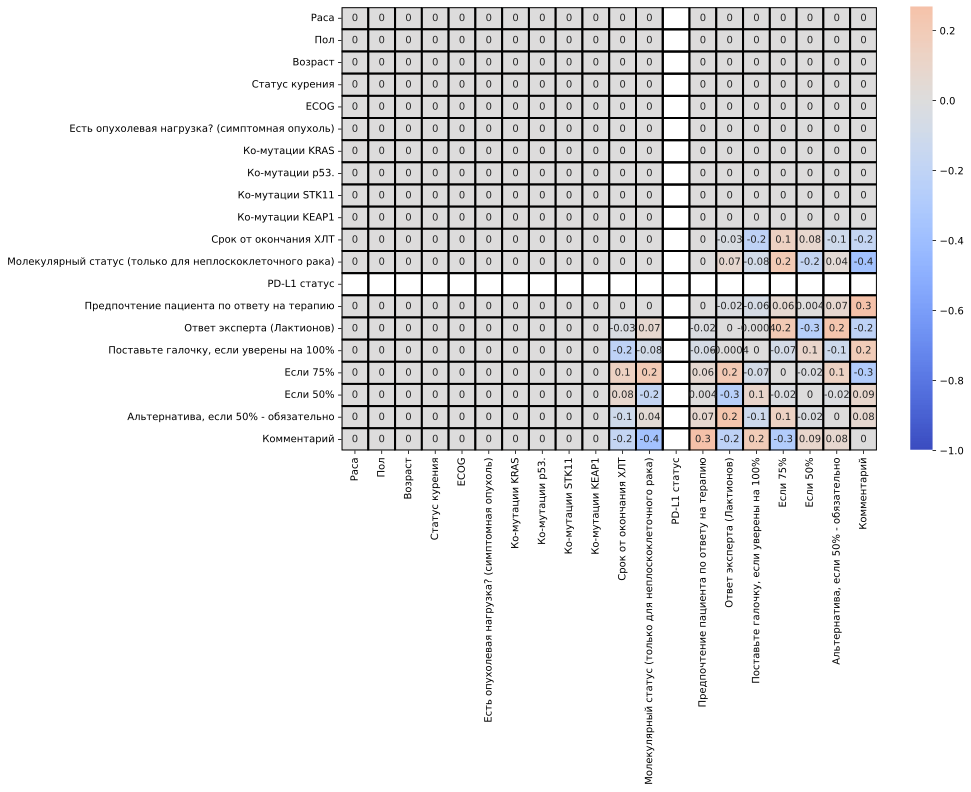

In [208]:
# Посмотрим на корреляцию для столбца PD-L1 статус
corr_matrix = categorical[categorical['PD-L1 статус'] == 1].corr('spearman')\
- categorical[categorical['PD-L1 статус'] == 3].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')